In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
plt.rcParams['figure.figsize']=(20,20)

In [40]:
df=pd.read_csv('/content/mushroom.csv')

In [41]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [42]:
names=df.columns
names

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [ ]:
# EDA

In [43]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [44]:
df.describe(include=object)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,4,9,2,9,4,3,2,12,2,...,9,9,2,4,3,8,9,6,7,2
top,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,enlarging,...,brown,orange,universal,white,one,sheathing,brown,abundant,urban,poisonous
freq,439,568,263,1023,274,540,677,1007,216,1040,...,271,259,1010,553,689,305,255,360,316,1400


In [45]:
df.shape

(2000, 26)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
oe=OrdinalEncoder()
oe.fit(df)

OrdinalEncoder()

In [49]:
df=oe.transform(df)

In [50]:
df

array([[889.,   4.,   2., ...,   1., 916., 190.],
       [786.,   4.,   0., ...,   0., 128., 750.],
       [246.,   3.,   1., ...,   1., 537., 281.],
       ...,
       [205.,   2.,   1., ...,   1., 859., 438.],
       [329.,   0.,   3., ...,   1., 679., 320.],
       [814.,   2.,   2., ...,   1., 825., 832.]])

In [51]:
df=pd.DataFrame(df,columns=names)

In [52]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889.0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,...,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1.0,916.0,190.0
1,786.0,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,...,1.0,0.0,2.0,6.0,1.0,2.0,5.0,0.0,128.0,750.0
2,246.0,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,...,1.0,3.0,2.0,6.0,6.0,0.0,5.0,1.0,537.0,281.0
3,221.0,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,1.0,234.0,829.0
4,630.0,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,...,1.0,2.0,0.0,4.0,8.0,1.0,4.0,1.0,895.0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656.0,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,...,0.0,1.0,1.0,2.0,6.0,0.0,1.0,1.0,283.0,680.0
1996,885.0,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,...,0.0,2.0,1.0,7.0,8.0,2.0,5.0,1.0,335.0,521.0
1997,205.0,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,...,0.0,0.0,2.0,1.0,8.0,0.0,6.0,1.0,859.0,438.0
1998,329.0,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,...,1.0,3.0,1.0,0.0,1.0,5.0,6.0,1.0,679.0,320.0


In [53]:
df.describe()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,481.087000,2.052500,1.556000,3.862000,0.511500,3.988500,1.561500,1.00650,0.503500,5.348000,...,0.5050,1.455500,0.990500,3.562000,3.905500,2.458000,3.070000,0.700000,478.79400,476.150500
std,284.172024,1.435888,1.114668,2.626672,0.499993,2.542361,1.126433,0.81902,0.500113,3.388752,...,0.5001,1.117875,0.809776,2.294295,2.619351,1.732263,1.971559,0.458372,281.44026,284.323836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,228.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000,...,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,238.00000,227.750000
50%,479.000000,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.00000,1.000000,5.000000,...,1.0000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,478.50000,462.500000
75%,729.250000,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,2.00000,1.000000,8.000000,...,1.0000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,729.25000,734.250000
max,975.000000,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.00000,1.000000,11.000000,...,1.0000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,972.00000,975.000000


In [55]:
df.duplicated().sum()

1024

In [56]:
df[df.duplicated(keep=False)]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889.0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,...,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1.0,916.0,190.0
1,786.0,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,...,1.0,0.0,2.0,6.0,1.0,2.0,5.0,0.0,128.0,750.0
2,246.0,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,...,1.0,3.0,2.0,6.0,6.0,0.0,5.0,1.0,537.0,281.0
3,221.0,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,1.0,234.0,829.0
4,630.0,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,...,1.0,2.0,0.0,4.0,8.0,1.0,4.0,1.0,895.0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,483.0,3.0,1.0,3.0,1.0,5.0,3.0,1.0,0.0,3.0,...,1.0,3.0,1.0,7.0,1.0,0.0,2.0,1.0,965.0,47.0
1994,662.0,3.0,2.0,4.0,0.0,8.0,0.0,2.0,1.0,9.0,...,1.0,0.0,2.0,7.0,1.0,0.0,2.0,1.0,196.0,157.0
1995,656.0,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,...,0.0,1.0,1.0,2.0,6.0,0.0,1.0,1.0,283.0,680.0
1997,205.0,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,...,0.0,0.0,2.0,1.0,8.0,0.0,6.0,1.0,859.0,438.0


In [57]:
df.drop_duplicates(inplace=True)

In [59]:
df.shape

(976, 26)

In [92]:
mn=MinMaxScaler()
df=mn.fit_transform(df)

In [94]:
df=pd.DataFrame(df,columns=names)
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,0.911795,1.00,0.666667,0.875,0.0,0.125,0.333333,1.0,0.0,0.636364,...,0.0,0.000000,1.0,0.857143,0.375,0.2,0.833333,1.0,0.942387,0.194872
1,0.806154,1.00,0.000000,0.750,0.0,0.125,1.000000,0.5,1.0,0.272727,...,1.0,0.000000,1.0,0.857143,0.125,0.4,0.833333,0.0,0.131687,0.769231
2,0.252308,0.75,0.333333,0.625,1.0,0.500,0.333333,0.5,0.0,0.727273,...,1.0,1.000000,1.0,0.857143,0.750,0.0,0.833333,1.0,0.552469,0.288205
3,0.226667,0.00,0.666667,0.500,1.0,0.375,1.000000,0.0,0.0,0.545455,...,0.0,1.000000,1.0,0.000000,0.500,0.2,0.000000,1.0,0.240741,0.850256
4,0.646154,0.75,1.000000,1.000,1.0,0.625,0.666667,0.5,1.0,0.545455,...,1.0,0.666667,0.0,0.571429,1.000,0.2,0.666667,1.0,0.920782,0.496410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.684103,0.25,0.333333,0.000,0.0,0.500,1.000000,0.5,0.0,0.272727,...,1.0,0.000000,0.0,0.428571,0.125,0.4,0.500000,0.0,0.842593,0.398974
972,0.725128,0.00,0.333333,0.500,1.0,0.125,0.333333,1.0,0.0,0.090909,...,0.0,0.000000,1.0,0.714286,1.000,0.4,0.000000,1.0,0.115226,0.762051
973,0.232821,1.00,1.000000,0.625,1.0,0.125,0.333333,0.5,1.0,0.181818,...,1.0,0.333333,1.0,0.571429,0.625,0.0,0.000000,0.0,0.853909,0.625641
974,0.907692,1.00,0.666667,0.625,1.0,0.625,0.000000,1.0,1.0,0.818182,...,0.0,0.666667,0.5,1.000000,1.000,0.4,0.833333,1.0,0.344650,0.534359


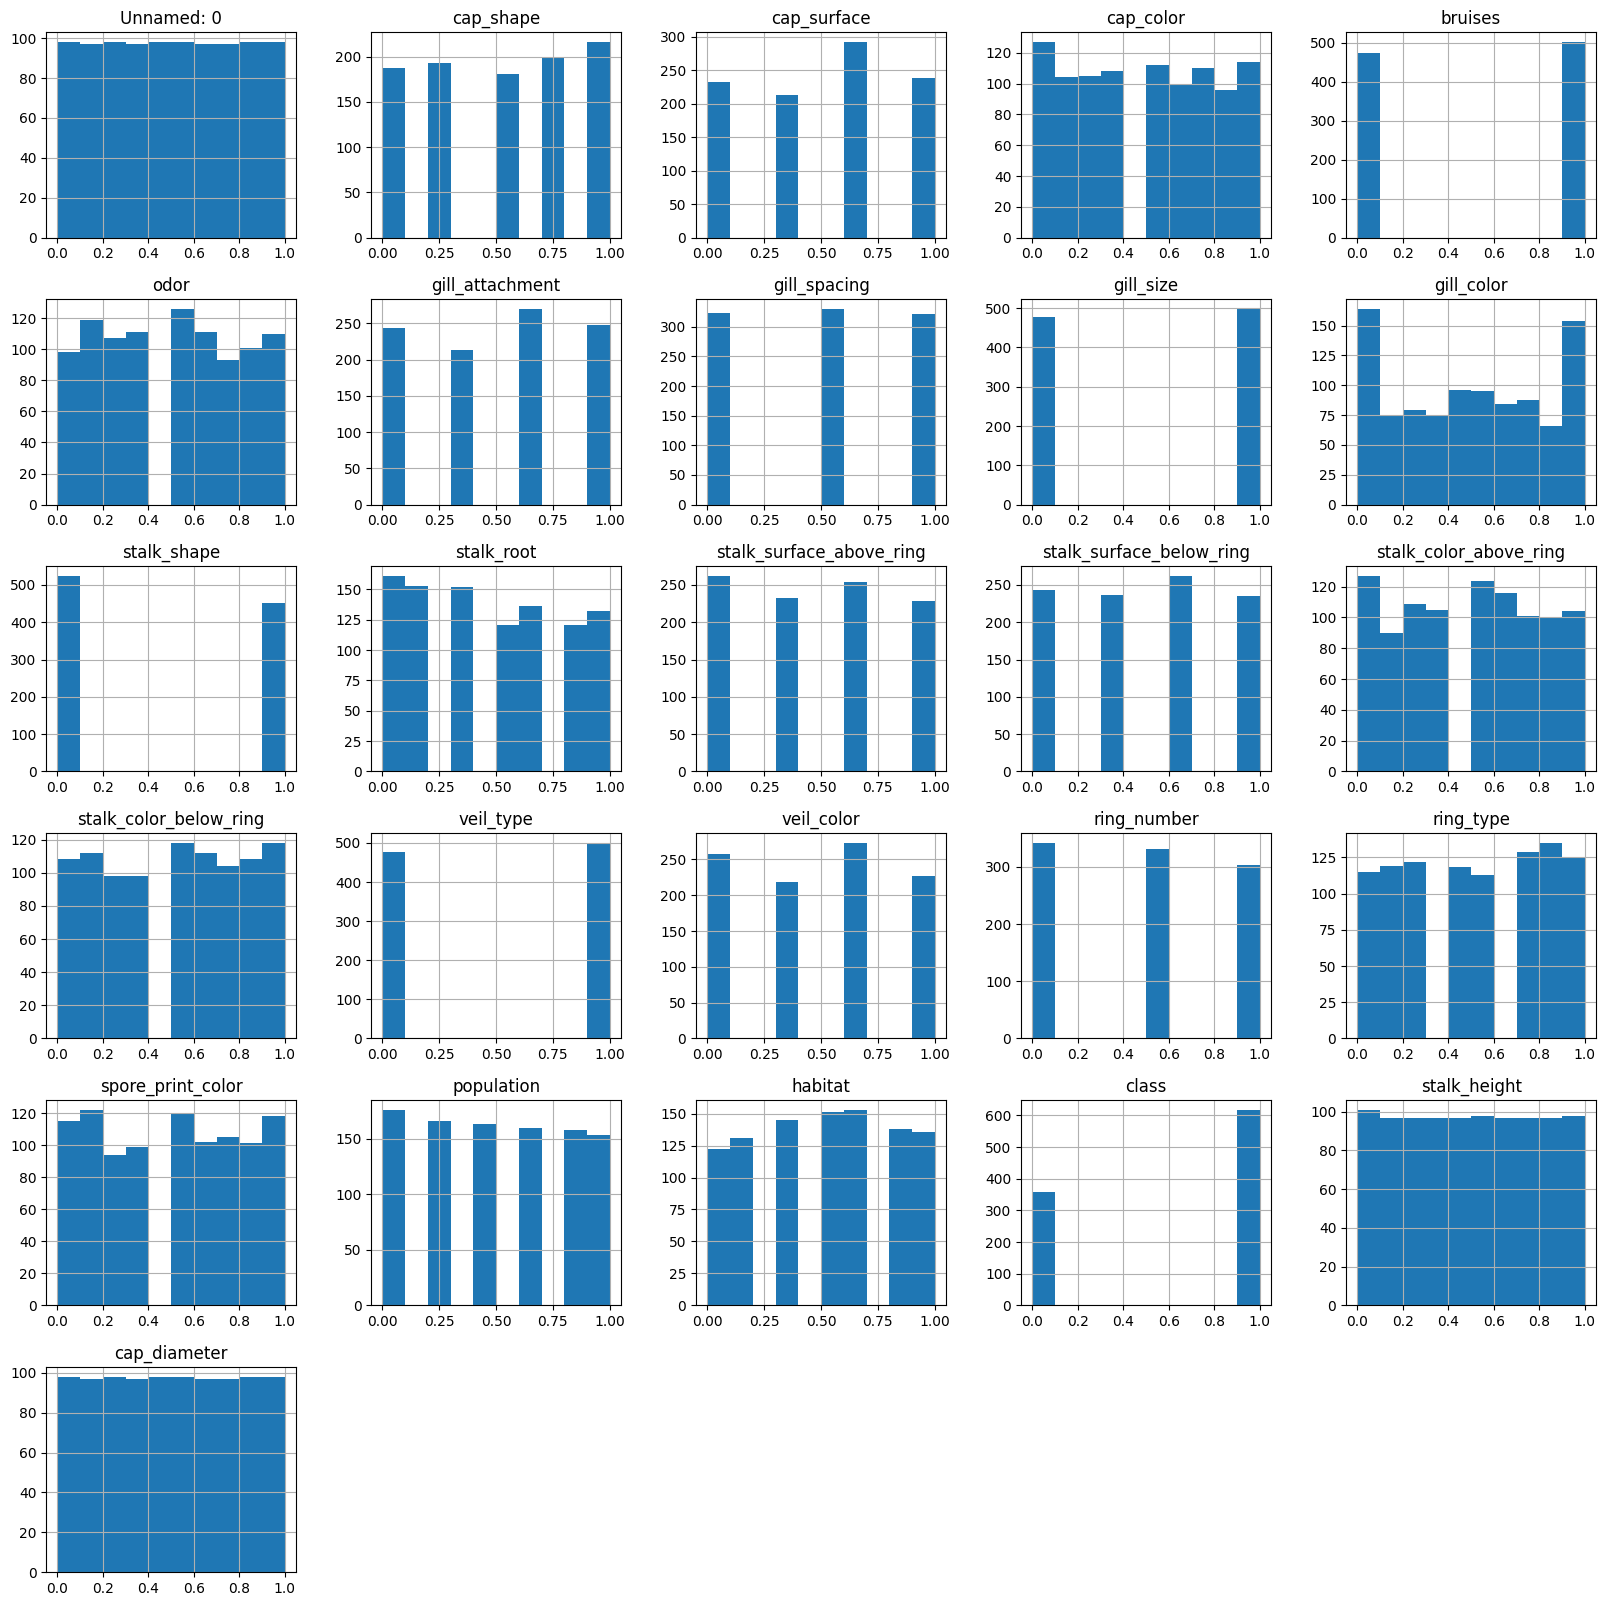

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [95]:
df.hist()
plt.show()
plt.tight_layout

<Axes: >

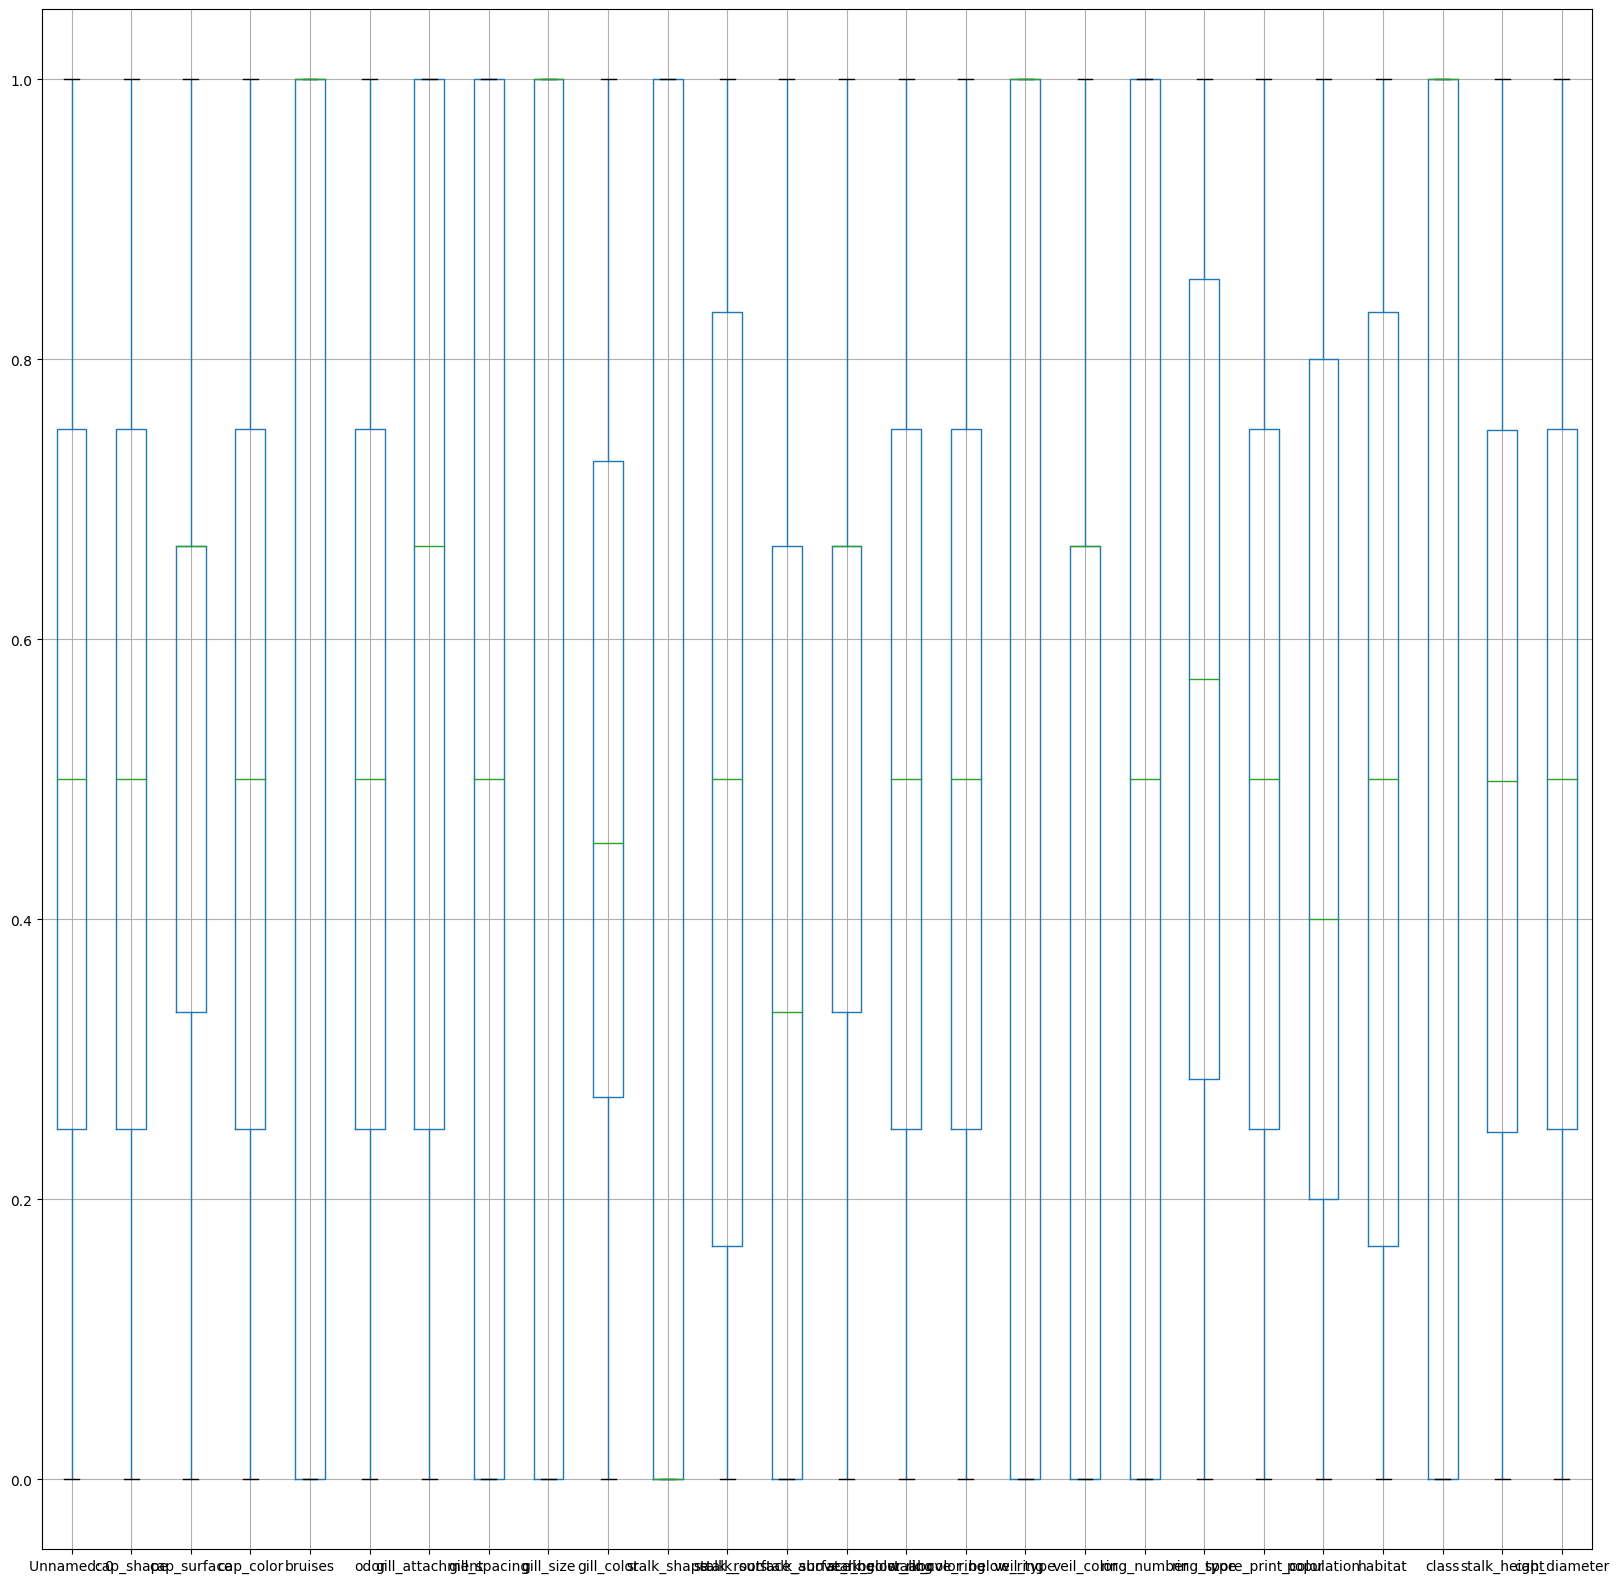

In [96]:
df.boxplot()

In [97]:
df.corr()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.003994,-0.024853,0.040070,-0.019282,-0.017484,-0.017097,0.042679,0.025352,0.019288,...,0.032557,0.003737,-0.068040,0.000254,-0.003676,0.009001,0.034993,0.021075,0.001462,0.042838
cap_shape,-0.003994,1.000000,0.024645,0.020694,-0.007043,-0.035072,0.017091,-0.026279,0.017675,0.050239,...,-0.015447,-0.004381,0.038398,0.012335,0.008641,0.009890,-0.003017,0.008132,-0.020207,0.016437
cap_surface,-0.024853,0.024645,1.000000,0.010129,-0.013355,-0.001229,-0.008412,0.033273,-0.046493,0.033423,...,-0.042954,0.027026,0.005017,0.002838,-0.057301,-0.026943,-0.038786,-0.047799,0.025817,0.030744
cap_color,0.040070,0.020694,0.010129,1.000000,0.007862,-0.056524,0.000201,0.001367,0.034965,0.005884,...,-0.008664,-0.027817,0.037536,0.023527,0.045805,-0.039548,-0.006857,-0.048735,0.026889,0.006585
bruises,-0.019282,-0.007043,-0.013355,0.007862,1.000000,0.051111,0.006422,-0.017566,-0.004689,-0.033166,...,0.007497,-0.023444,-0.037722,-0.067596,-0.028591,0.014990,0.011681,-0.007932,0.068623,-0.048393
odor,-0.017484,-0.035072,-0.001229,-0.056524,0.051111,1.000000,-0.013212,-0.030698,-0.057671,-0.030782,...,0.022875,0.033718,-0.031397,0.005064,-0.078276,-0.000816,-0.021675,0.009625,-0.001618,-0.044851
gill_attachment,-0.017097,0.017091,-0.008412,0.000201,0.006422,-0.013212,1.000000,-0.024634,-0.011606,0.026293,...,-0.044643,-0.005227,0.048239,-0.049124,-0.020564,0.003722,-0.020783,-0.023758,-0.001652,-0.013763
gill_spacing,0.042679,-0.026279,0.033273,0.001367,-0.017566,-0.030698,-0.024634,1.000000,0.012648,-0.004135,...,-0.027653,-0.003433,0.009182,0.008323,0.023472,0.005042,0.024691,0.045121,0.004417,0.035384
gill_size,0.025352,0.017675,-0.046493,0.034965,-0.004689,-0.057671,-0.011606,0.012648,1.000000,-0.022993,...,-0.041509,-0.005179,-0.022972,0.005937,0.033767,0.002667,0.014063,0.019853,-0.015714,-0.029273
gill_color,0.019288,0.050239,0.033423,0.005884,-0.033166,-0.030782,0.026293,-0.004135,-0.022993,1.000000,...,-0.024141,-0.011001,-0.021489,0.019591,0.005718,0.024611,0.014710,-0.000277,0.025191,-0.007877


<Axes: >

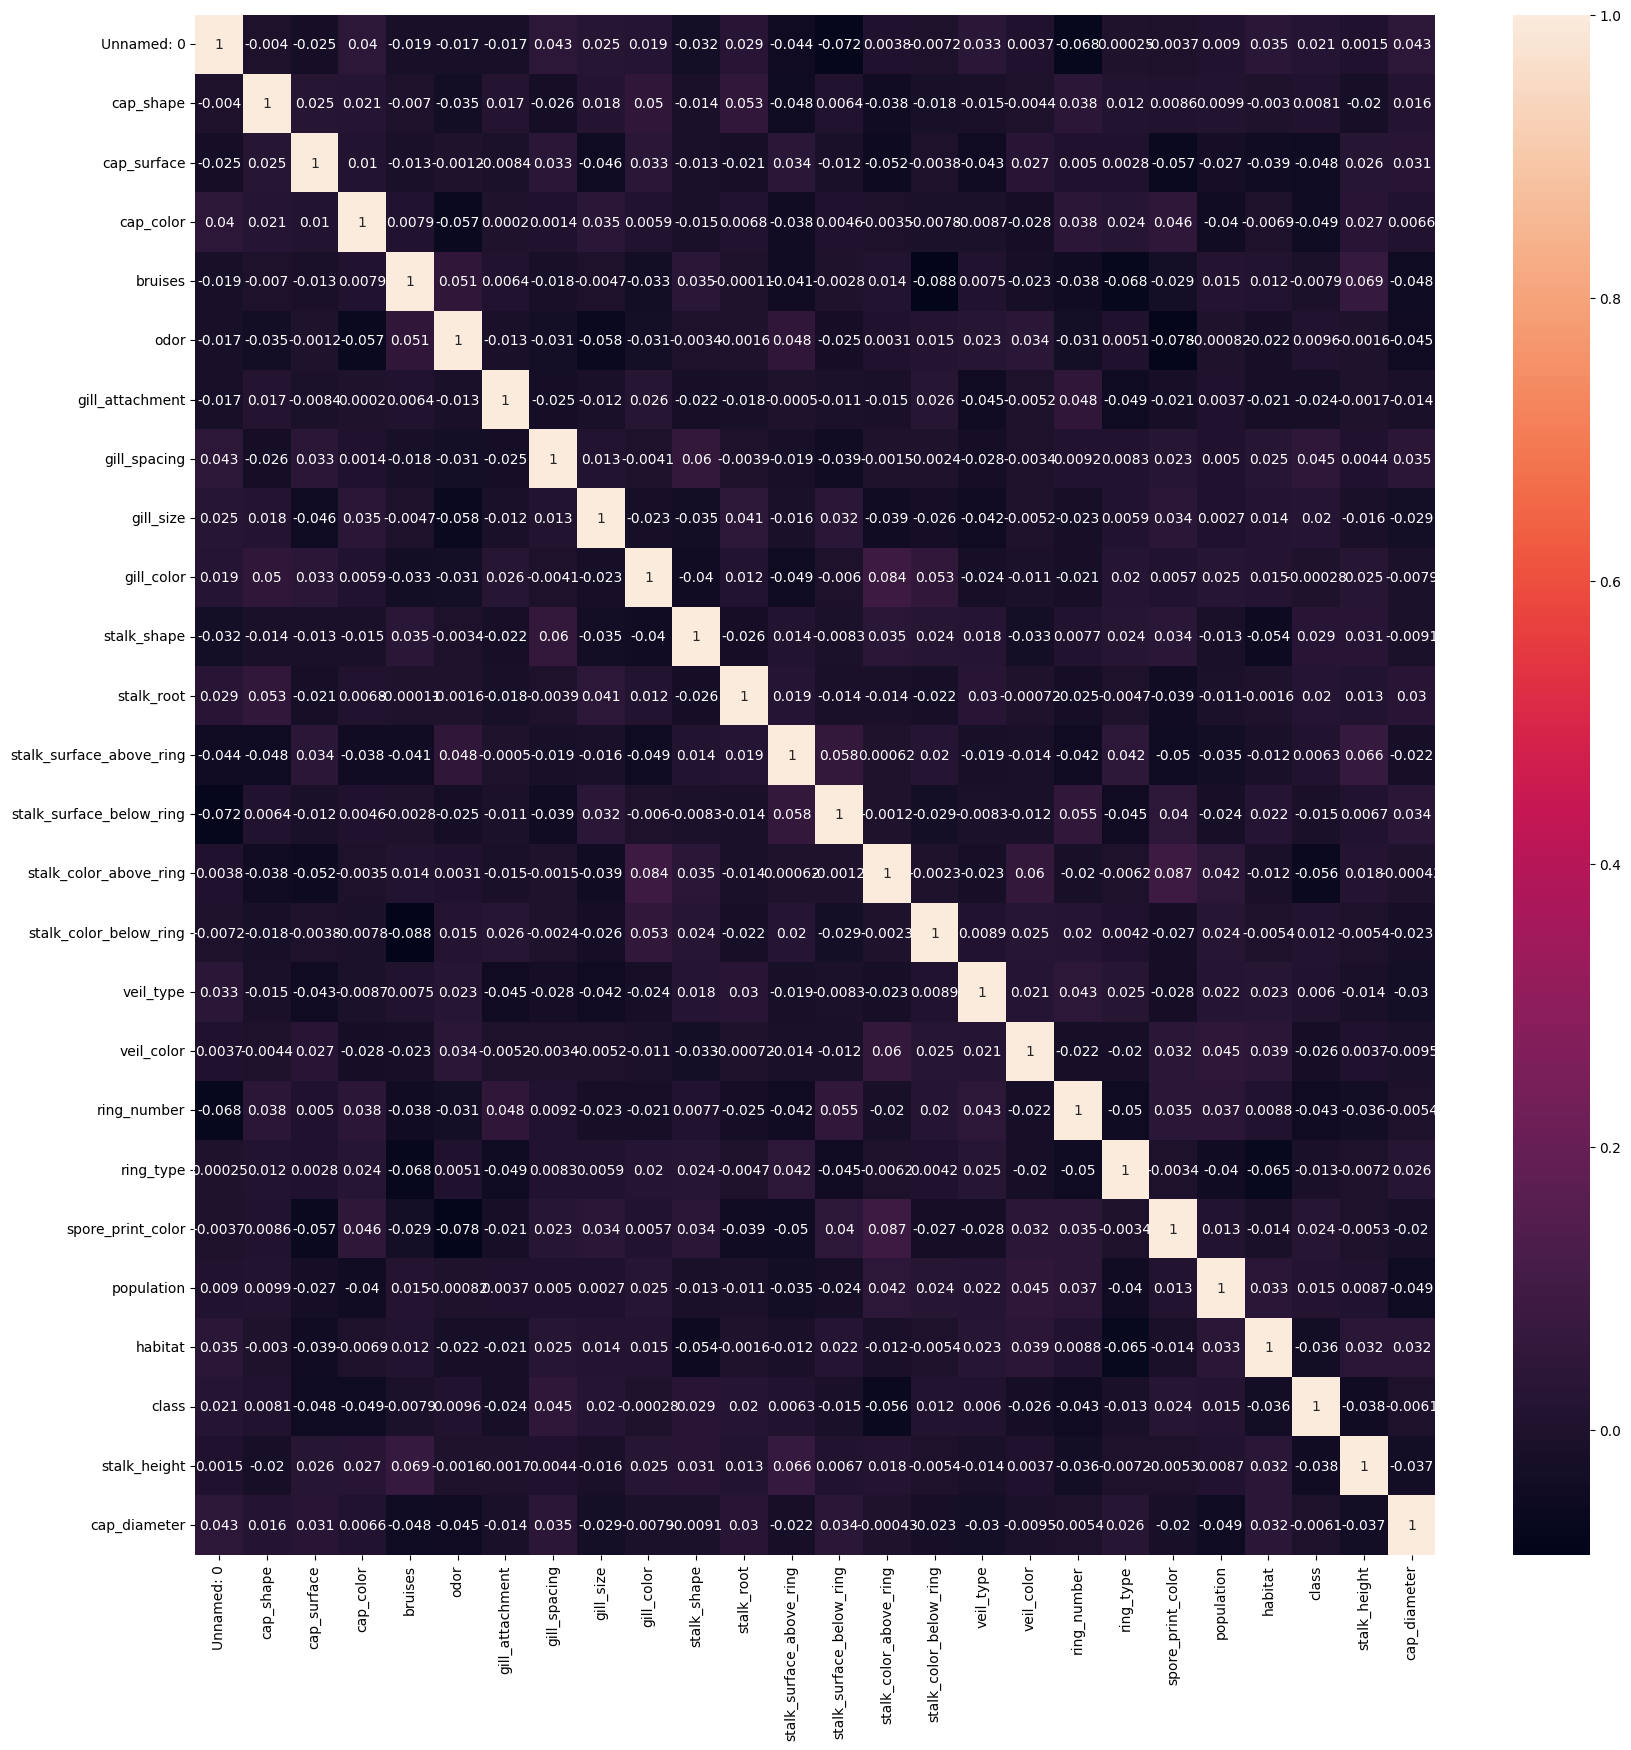

In [98]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#sns.pairplot(df,hue='class')

In [99]:
df_= df.drop(columns='class')

In [100]:
df_

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,0.911795,1.00,0.666667,0.875,0.0,0.125,0.333333,1.0,0.0,0.636364,...,1.000,0.0,0.000000,1.0,0.857143,0.375,0.2,0.833333,0.942387,0.194872
1,0.806154,1.00,0.000000,0.750,0.0,0.125,1.000000,0.5,1.0,0.272727,...,0.000,1.0,0.000000,1.0,0.857143,0.125,0.4,0.833333,0.131687,0.769231
2,0.252308,0.75,0.333333,0.625,1.0,0.500,0.333333,0.5,0.0,0.727273,...,0.375,1.0,1.000000,1.0,0.857143,0.750,0.0,0.833333,0.552469,0.288205
3,0.226667,0.00,0.666667,0.500,1.0,0.375,1.000000,0.0,0.0,0.545455,...,0.625,0.0,1.000000,1.0,0.000000,0.500,0.2,0.000000,0.240741,0.850256
4,0.646154,0.75,1.000000,1.000,1.0,0.625,0.666667,0.5,1.0,0.545455,...,0.875,1.0,0.666667,0.0,0.571429,1.000,0.2,0.666667,0.920782,0.496410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.684103,0.25,0.333333,0.000,0.0,0.500,1.000000,0.5,0.0,0.272727,...,1.000,1.0,0.000000,0.0,0.428571,0.125,0.4,0.500000,0.842593,0.398974
972,0.725128,0.00,0.333333,0.500,1.0,0.125,0.333333,1.0,0.0,0.090909,...,0.625,0.0,0.000000,1.0,0.714286,1.000,0.4,0.000000,0.115226,0.762051
973,0.232821,1.00,1.000000,0.625,1.0,0.125,0.333333,0.5,1.0,0.181818,...,0.750,1.0,0.333333,1.0,0.571429,0.625,0.0,0.000000,0.853909,0.625641
974,0.907692,1.00,0.666667,0.625,1.0,0.625,0.000000,1.0,1.0,0.818182,...,0.500,0.0,0.666667,0.5,1.000000,1.000,0.4,0.833333,0.344650,0.534359


In [101]:
x=df_
x

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,0.911795,1.00,0.666667,0.875,0.0,0.125,0.333333,1.0,0.0,0.636364,...,1.000,0.0,0.000000,1.0,0.857143,0.375,0.2,0.833333,0.942387,0.194872
1,0.806154,1.00,0.000000,0.750,0.0,0.125,1.000000,0.5,1.0,0.272727,...,0.000,1.0,0.000000,1.0,0.857143,0.125,0.4,0.833333,0.131687,0.769231
2,0.252308,0.75,0.333333,0.625,1.0,0.500,0.333333,0.5,0.0,0.727273,...,0.375,1.0,1.000000,1.0,0.857143,0.750,0.0,0.833333,0.552469,0.288205
3,0.226667,0.00,0.666667,0.500,1.0,0.375,1.000000,0.0,0.0,0.545455,...,0.625,0.0,1.000000,1.0,0.000000,0.500,0.2,0.000000,0.240741,0.850256
4,0.646154,0.75,1.000000,1.000,1.0,0.625,0.666667,0.5,1.0,0.545455,...,0.875,1.0,0.666667,0.0,0.571429,1.000,0.2,0.666667,0.920782,0.496410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.684103,0.25,0.333333,0.000,0.0,0.500,1.000000,0.5,0.0,0.272727,...,1.000,1.0,0.000000,0.0,0.428571,0.125,0.4,0.500000,0.842593,0.398974
972,0.725128,0.00,0.333333,0.500,1.0,0.125,0.333333,1.0,0.0,0.090909,...,0.625,0.0,0.000000,1.0,0.714286,1.000,0.4,0.000000,0.115226,0.762051
973,0.232821,1.00,1.000000,0.625,1.0,0.125,0.333333,0.5,1.0,0.181818,...,0.750,1.0,0.333333,1.0,0.571429,0.625,0.0,0.000000,0.853909,0.625641
974,0.907692,1.00,0.666667,0.625,1.0,0.625,0.000000,1.0,1.0,0.818182,...,0.500,0.0,0.666667,0.5,1.000000,1.000,0.4,0.833333,0.344650,0.534359


In [102]:
y=df['class']
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
971    0.0
972    1.0
973    0.0
974    1.0
975    1.0
Name: class, Length: 976, dtype: float64

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [104]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [105]:
y_pred=svm.predict(x_test)

In [107]:
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy= ",acc)
confusion_matrix(y_test,y_pred)

Accuracy=  58.673469387755105


array([[  0,  80],
       [  1, 115]])

In [113]:
clf = SVC()
param_grid = [{'kernel':['rbf','linear','poly'],'gamma':[50,5,10,0.5,1,0.0001],'C':[1,15,14,13,12,11,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.0001],
                          'kernel': ['rbf', 'linear', 'poly']}])

In [114]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 50, 'kernel': 'rbf'}, 0.6435897435897437)

In [115]:
clf = SVC(C=1,gamma= 50 ,kernel='rbf') # can change kernel and check accuracy
clf.fit(x_train , y_train) #build model
y_pred = clf.predict(x_test)#predict on test dataset
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 59.183673469387756


array([[  0,  80],
       [  0, 116]])